In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
data_dir = 'Pikun/Combined Dataset/train'
# Tentukan ukuran gambar yang digunakan
image_size = (128, 128)  # Ukuran gambar yang diresize
batch_size = 32  # Ukuran batch untuk training

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

# Membaca gambar dan membagi data menjadi training
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir),
    target_size=image_size,  # Mengubah ukuran gambar
    batch_size=batch_size,
    class_mode='categorical', 
    shuffle=True 
)

# Menampilkan informasi tentang dataset
print(train_generator.class_indices)

Found 10240 images belonging to 4 classes.
{'Mild Impairment': 0, 'Moderate Impairment': 1, 'No Impairment': 2, 'Very Mild Impairment': 3}


# Training

In [4]:
# Membangun model CNN
model = tf.keras.Sequential([
    # Layer Konvolusi 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Layer Konvolusi 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Layer Konvolusi 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten hasil konvolusi
    tf.keras.layers.Flatten(),

    # Fully Connected Layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Regularisasi dengan Dropout

    # Output Layer (3 kelas: glioma, nontumor, meningioma)
    tf.keras.layers.Dense(4, activation='softmax')  # Softmax untuk multi-class classification
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Karena klasifikasi multi-kelas
    metrics=['accuracy']
)

# Ringkasan Model
model.summary()


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50  # Bisa disesuaikan
)

Epoch 1/50


C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


320/320 ━━━━━━━━━━━━━━━━━━━━ 46s 139ms/step - accuracy: 0.5364 - loss: 0.9843
Epoch 2/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 53us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


C:\Users\User\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


320/320 ━━━━━━━━━━━━━━━━━━━━ 46s 143ms/step - accuracy: 0.7865 - loss: 0.4626
Epoch 4/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 53s 165ms/step - accuracy: 0.8470 - loss: 0.3371
Epoch 6/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 53s 164ms/step - accuracy: 0.8911 - loss: 0.2470
Epoch 8/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 53s 166ms/step - accuracy: 0.9275 - loss: 0.1804
Epoch 10/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 53s 165ms/step - accuracy: 0.9440 - loss: 0.1454
Epoch 12/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 55s 172ms/step - accuracy: 0.9581 - loss: 0.105

# Testing

In [6]:
data_dir_testing = 'Pikun/Combined Dataset/test'
image_size_testing = (128, 128)  # Ukuran gambar yang diresize
batch_size_testing = 32  # Ukuran batch untuk testing

In [7]:
# ImageDataGenerator untuk normalisasi gambar
test_datagen = ImageDataGenerator(rescale=1./255)

# Membaca gambar dari folder testing dan mempersiapkan data untuk evaluasi
test_generator = test_datagen.flow_from_directory(
    data_dir_testing,  # Direktori data testing
    target_size=image_size_testing,  # Mengubah ukuran gambar
    batch_size=batch_size_testing,
    class_mode='categorical',  # Karena kita memiliki 3 kelas
    shuffle=False  # Tidak perlu mengacak data saat evaluasi
)
print(test_generator.class_indices)

Found 1279 images belonging to 4 classes.
{'Mild Impairment': 0, 'Moderate Impairment': 1, 'No Impairment': 2, 'Very Mild Impairment': 3}


In [8]:
# Evaluasi model pada data testing
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size_testing)

print(f"Testing Loss: {loss}")
print(f"Testing Accuracy: {accuracy}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9848 - loss: 0.0422
Testing Loss: 0.0925254300236702
Testing Accuracy: 0.9711538553237915


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step


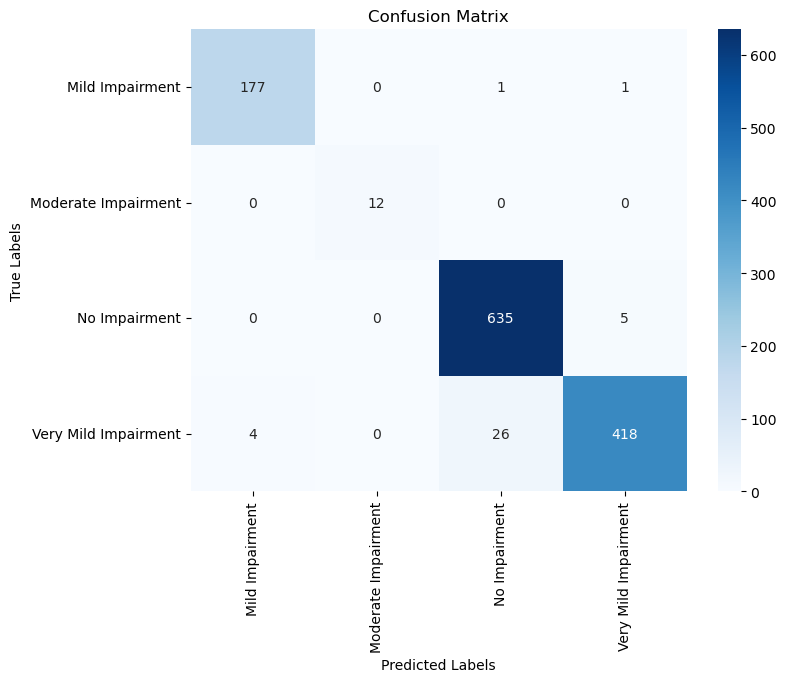

Classification Report:
                      precision    recall  f1-score   support

     Mild Impairment       0.98      0.99      0.98       179
 Moderate Impairment       1.00      1.00      1.00        12
       No Impairment       0.96      0.99      0.98       640
Very Mild Impairment       0.99      0.93      0.96       448

            accuracy                           0.97      1279
           macro avg       0.98      0.98      0.98      1279
        weighted avg       0.97      0.97      0.97      1279



In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

predictions = model.predict(test_generator, steps=test_generator.samples // batch_size_testing + 1)

# Mengambil kelas dengan probabilitas tertinggi
predicted_classes = np.argmax(predictions, axis=1)

# Kelas sebenarnya dari test_generator
true_classes = test_generator.classes

# Nama-nama kelas
class_labels = list(test_generator.class_indices.keys())

# Membuat confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Menampilkan confusion matrix dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'Pikun/Combined Dataset/test/Very Mild Impairment/9 (15).jpg'
img = image.load_img(img_path, target_size=(128, 128)) 
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array, axis=0)  # Menambah dimensi batch
img_array /= 255.0  

prediction = model.predict(img_array)

# Ambil kelas dengan probabilitas tertinggi
predicted_class = np.argmax(prediction)  # Ambil indeks kelas dengan probabilitas tertinggi
class_names = ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']

# Menampilkan prediksi
print(f"Prediksi kelas: {class_names[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Prediksi kelas: Very Mild Impairment
